In [1]:
import pandas as pd
df = pd.read_csv('train.csv')

/var/folders/tf/nb2206b133550_hpm_b_xr_40000gn/T/ipykernel_60351/2487694293.py:2: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [2]:
df.drop(columns= ['id', 'Unnamed: 21', 'Unnamed: 22', 'zipcode'], inplace= True)

JOB

In [3]:
df['job'].unique()

array(['admin.', 'housemaid', 'unknown', 'entrepreneur', 'technician',
       'self-employed', 'student', 'unemployed', 'services', 'management',
       'retired', 'blue-collar', nan, 'MANAGEMENT', 'STUDENT',
       'ENTREPRENEUR', 'HOUSEMAID', 'RETIRED', 'UNEMPLOYED', 'TECHNICIAN',
       'ADMIN.', 'BLUE-COLLAR', 'SELF-EMPLOYED'], dtype=object)

In [4]:
df['job'].fillna('Unknown', inplace=True)

/var/folders/tf/nb2206b133550_hpm_b_xr_40000gn/T/ipykernel_55830/660431346.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job'].fillna('Unknown', inplace=True)


In [5]:
def transform_text(text):
    text = text.lower()
    return text

df['job'] = df['job'].apply(transform_text)
df['job'].unique()

array(['admin.', 'housemaid', 'unknown', 'entrepreneur', 'technician',
       'self-employed', 'student', 'unemployed', 'services', 'management',
       'retired', 'blue-collar'], dtype=object)

In [6]:
df['job'].value_counts(normalize = True) * 100

job
management       8.738575
blue-collar      8.624664
unemployed       8.491769
admin.           8.483632
technician       8.410404
unknown          8.318190
housemaid        8.280220
services         8.201568
self-employed    8.185295
retired          8.179870
student          8.060535
entrepreneur     8.025277
Name: proportion, dtype: float64

Text(0.5, 1.0, 'job')

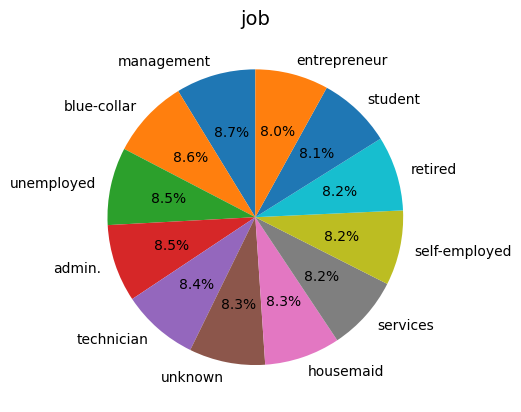

In [7]:
import matplotlib.pyplot as plt

category_counts = df['job'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('job', fontsize=14)

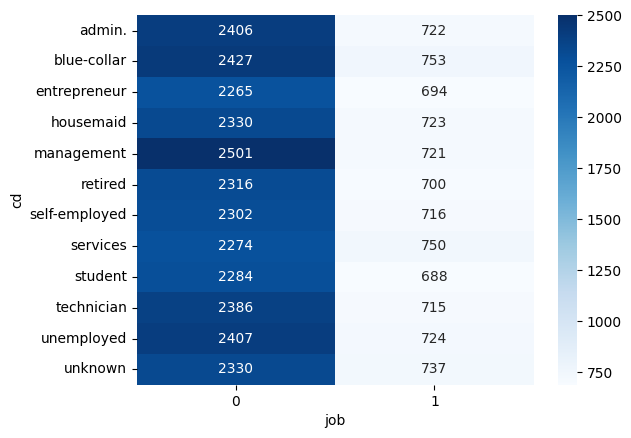

In [8]:
import seaborn as sns
crosstab = pd.crosstab(df['job'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.xlabel('job')
plt.ylabel('cd')
plt.show()

Martial

In [9]:
mode_val = df['marital'].mode()[0]
df['marital'].fillna(mode_val, inplace = True)

/var/folders/tf/nb2206b133550_hpm_b_xr_40000gn/T/ipykernel_55830/3725057828.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['marital'].fillna(mode_val, inplace = True)


In [10]:
df['marital'].value_counts(normalize = True) * 100

marital
married     49.003282
single      29.066204
divorced    21.930514
Name: proportion, dtype: float64

In [11]:
pd.crosstab(df['marital'], df['cd'])

cd,0,1
marital,,
divorced,6153,1933
married,13853,4215
single,8222,2495


Text(0.5, 1.0, 'job')

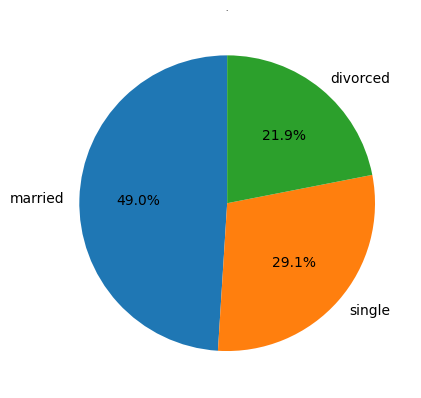

In [12]:
category_counts = df['marital'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('job', fontsize=1)

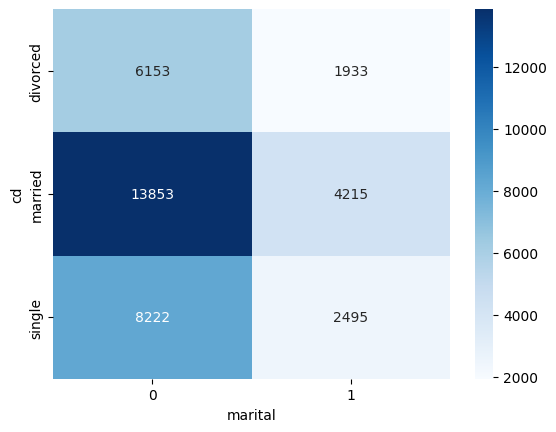

In [13]:
crosstab = pd.crosstab(df['marital'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.xlabel('marital')
plt.ylabel('cd')
plt.show()

Try Label Encoder

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['marital'] = label_encoder.fit_transform(df['marital'])

In [15]:
"""freq_encoding = df['marital'].value_counts().to_dict()
df['marital'] = df['marital'].map(freq_encoding)"""

"freq_encoding = df['marital'].value_counts().to_dict()\ndf['marital'] = df['marital'].map(freq_encoding)"

POUTCOME

In [16]:
df['poutcome'].unique()

array(['failure', 'unknown', 'other', 'success'], dtype=object)

In [17]:
df['poutcome'].value_counts(normalize = True) * 100

poutcome
unknown    26.126224
other      25.263757
failure    24.726750
success    23.883269
Name: proportion, dtype: float64

In [18]:
pd.crosstab(df['poutcome'], df['cd'])

cd,0,1
poutcome,,
failure,6996,2121
other,7102,2213
success,6654,2152
unknown,7476,2157


Text(0.5, 1.0, 'poutcome')

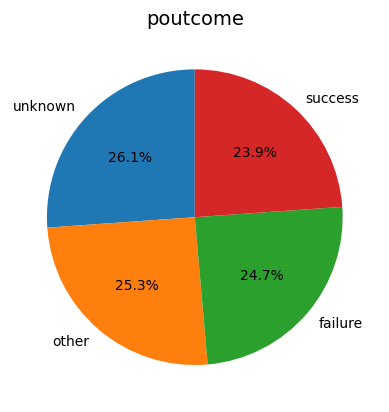

In [19]:
category_counts = df['poutcome'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('poutcome', fontsize=14)

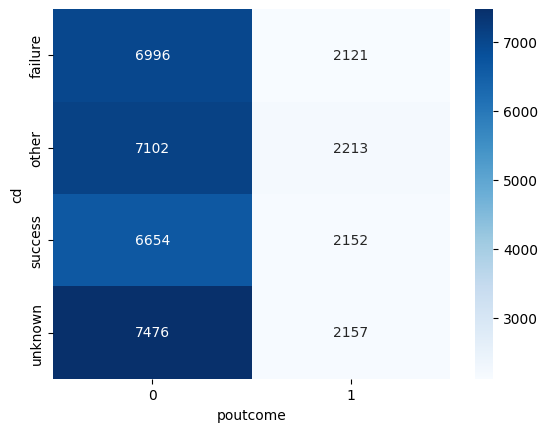

In [20]:
crosstab = pd.crosstab(df['poutcome'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.xlabel('poutcome')
plt.ylabel('cd')
plt.show()

Contact

In [21]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [22]:
pd.crosstab(df['contact'], df['cd'])

cd,0,1
contact,,
cellular,10052,3032
telephone,8680,2954
unknown,9496,2657


In [23]:
df['contact'].value_counts(normalize = True) * 100

contact
cellular     35.485883
unknown      32.960864
telephone    31.553253
Name: proportion, dtype: float64

Text(0.5, 1.0, 'contact')

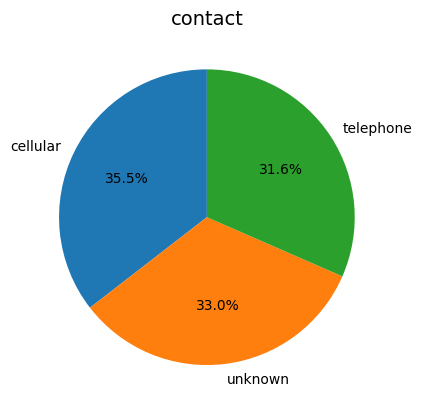

In [24]:
category_counts = df['contact'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('contact', fontsize=14)

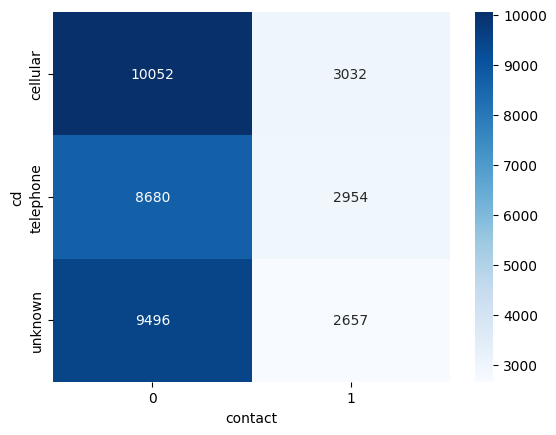

In [25]:
crosstab = pd.crosstab(df['contact'], df['cd'])
sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.xlabel('contact')
plt.ylabel('cd')
plt.show()

Applying OHE on job, marital, poutcome, and contact

In [26]:
from sklearn.preprocessing import OneHotEncoder

cols_to_ohe = ['job', 'contact', 'poutcome']

ohe = OneHotEncoder(sparse_output=False)

for col in cols_to_ohe:
    encoded_col = ohe.fit_transform(df[[col]])
    encoded_df = pd.DataFrame(encoded_col, columns=ohe.get_feature_names_out([col])).astype(int)
    df = pd.concat([df, encoded_df], axis=1).drop([col], axis=1)

Generation

In [27]:
df['generation'].unique()

array(['Millennials', 'Silent Generation', 'Older Boomers', 'Gen X',
       'Younger Boomers', nan, 'millennials', 'gen x',
       'silent generation', 'older boomers', 'Millenials', 'oler boomers'],
      dtype=object)

In [28]:
df['generation'] = df['generation'].replace({
    'Silent Generation' : 'Silent',
    'silent generation': 'Silent',
    'oler boomers': 'Older',
    'Older Boomers': 'Older',
    'older boomers': 'Older',
    'Younger Boomers': 'Younger',
    'Gen X': 'Gen X',
    'gen x': 'Gen X',
    'millennials': 'Millenials',
    'Millennials': 'Millenials',
    'Millenials':'Millenials'
})

In [29]:
df['generation'].unique()

array(['Millenials', 'Silent', 'Older', 'Gen X', 'Younger', nan],
      dtype=object)

In [30]:
df['generation'].isnull().sum()/len(df['generation'])

0.00743131458327683

In [31]:
df['generation']= df['generation'].fillna(df['generation'].mode()[0])

In [32]:
pd.crosstab(df['generation'], df['cd'])

cd,0,1
generation,,
Gen X,4574,1384
Millenials,6423,1968
Older,3409,1020
Silent,10199,3184
Younger,3623,1087


Text(0.5, 1.0, 'generation')

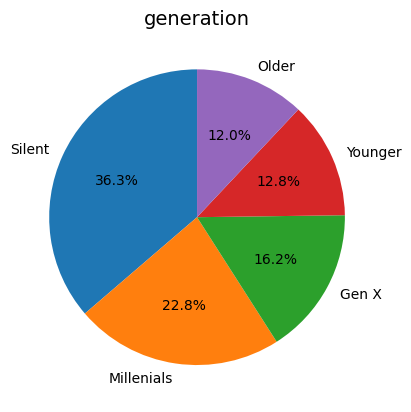

In [33]:
category_counts = df['generation'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('generation', fontsize=14)

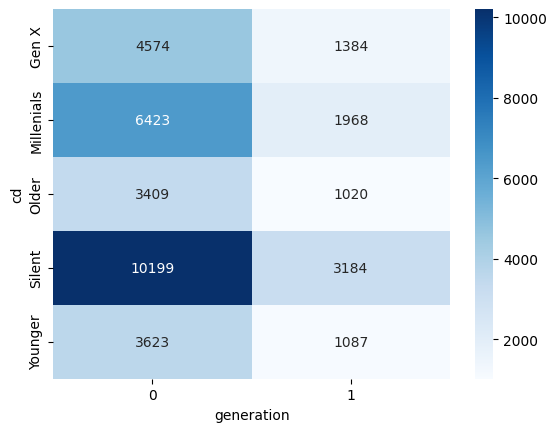

In [34]:
crosstab = pd.crosstab(df['generation'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.xlabel('generation')
plt.ylabel('cd')
plt.show()

Try Label Encoder

In [35]:
label_encoder = LabelEncoder()
df['generation'] = label_encoder.fit_transform(df['generation'])

In [36]:
"""freq_encoding = df['generation'].value_counts().to_dict()
df['generation'] = df['generation'].map(freq_encoding)"""

"freq_encoding = df['generation'].value_counts().to_dict()\ndf['generation'] = df['generation'].map(freq_encoding)"

Education

In [37]:
df['education'].unique()

array(['tertiary', 'primary', 'unknown', 'secondary', 'primery',
       'secendary'], dtype=object)

In [38]:
df['education'] = df['education'].replace({
    'tertiary': 'Tertiary',
    'primary': 'Primary',
    'primery': 'Primary',    
    'secondary': 'Secondary',
    'secendary': 'Secondary', 
    'unknown': 'Unknown'
})

In [39]:
df['education'].value_counts(normalize = True) * 100

education
Secondary    46.678962
Tertiary     29.155705
Primary      15.451168
Unknown       8.714166
Name: proportion, dtype: float64

In [40]:
pd.crosstab(df['education'], df['cd'])

cd,0,1
education,,
Primary,4358,1339
Secondary,13118,4093
Tertiary,8317,2433
Unknown,2435,778


Text(0.5, 1.0, 'education')

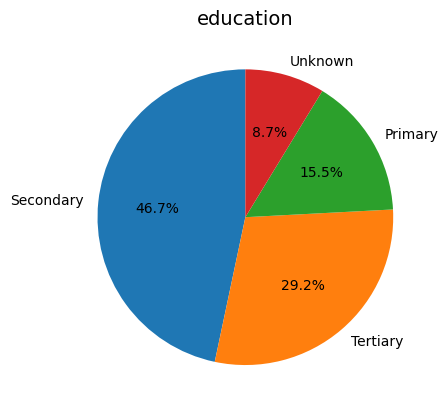

In [41]:
category_counts = df['education'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('education', fontsize=14)

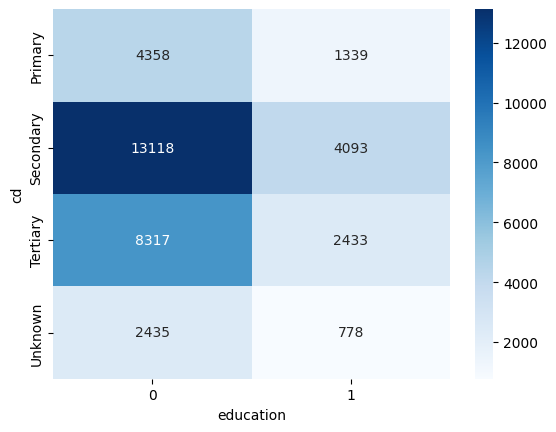

In [42]:
crosstab = pd.crosstab(df['education'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.xlabel('education')
plt.ylabel('cd')
plt.show()

Try Label Encoder

In [43]:
label_encoder = LabelEncoder()
df['education'] = label_encoder.fit_transform(df['education'])

In [44]:
df

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,25,2,2,no,11924,no,no,13,jan,4102,...,0,0,0,0,0,1,1,0,0,0
1,23,0,0,no,398,yes,no,20,jun,66,...,0,0,0,1,0,0,0,0,0,1
2,74,1,3,no,2177,yes,no,19,may,10,...,0,0,1,0,0,1,1,0,0,0
3,60,1,2,no,26673,yes,no,6,oct,3902,...,0,0,0,1,0,0,0,0,0,1
4,32,2,0,no,6358,no,yes,15,feb,3563,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36866,53,1,1,no,26564,yes,yes,1,feb,1011,...,1,0,0,0,0,1,0,1,0,0
36867,64,0,1,no,85454,no,no,7,apr,3761,...,0,0,0,0,0,1,0,1,0,0
36868,83,0,2,no,52800,yes,no,29,aug,3840,...,0,0,0,1,0,0,0,1,0,0
36869,86,1,1,yes,1898,no,no,27,sep,2524,...,0,1,0,1,0,0,0,0,1,0


In [45]:
"""freq_encoding = df['education'].value_counts().to_dict()
df['education'] = df['education'].map(freq_encoding)"""

"freq_encoding = df['education'].value_counts().to_dict()\ndf['education'] = df['education'].map(freq_encoding)"

Default

In [46]:
df = df.rename(columns = {
    'default': 'credit_default'})

Credit_default, Housing, Loan, Month

In [47]:
from sklearn.preprocessing import LabelEncoder

cols_to_map = ['credit_default', 'housing', 'loan']
le = LabelEncoder()

for col in cols_to_map:
    # Convert to String and Clean the Data
    df[col] = df[col].astype(str).str.strip().str.title()
    df[col] = le.fit_transform(df[col])

Day and Month into Day of year

In [48]:
df['month'].unique()

array(['jan', 'jun', 'may', 'oct', 'feb', 'dec', 'apr', 'nov', 'aug',
       'jul', 'mar', 'sep'], dtype=object)

In [49]:
df['month'] = df['month'].astype(str).str.strip().str.lower()

month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df['month_num'] = df['month'].str.lower().map(month_mapping)
df['month_num'] = df['month_num'].astype(int)


# Create a temporary DataFrame with the combination of year, month, and day
temp_df = df[['month_num', 'day']].rename(columns={'month_num': 'month'}).assign(year=2022)
invalid_dates = temp_df[pd.to_datetime(temp_df, errors='coerce').isna()]
df = df[~pd.to_datetime(temp_df, errors='coerce').isna()]

df['day_of_year'] = pd.to_datetime(df[['month_num', 'day']].rename(columns={'month_num': 'month'}).assign(year=2022)).dt.dayofyear

Previous, Campaign

In [50]:
df['previous'] = df['previous'].fillna(0)
df['campaign'] = df['campaign'].fillna(0)

In [51]:
df['previous'].astype(int)
df['previous'].astype(int)

0         8
1         4
2         4
3         6
4        24
         ..
36866    24
36867    58
36868    17
36869     5
36870    29
Name: previous, Length: 36547, dtype: int64

Previous

In [52]:
# Capping at the 1st and 99th percentiles
lower_limit = df['previous'].quantile(0.01)
upper_limit = df['previous'].quantile(0.99)
df['previous'] = df['previous'].clip(lower_limit, upper_limit)

In [53]:
import numpy as np

df['previous'] = 1 / (df['previous'] + 0.0001)  

State

In [54]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['state'] = label_encoder.fit_transform(df['state'])

In [55]:
df.columns

Index(['age', 'marital', 'education', 'credit_default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'cd', 'generation', 'state', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'month_num',
       'day_of_year'],
      dtype='object')

In [56]:
df.drop(columns = ['month_num', 'day', 'month'],inplace = True)

In [57]:
X = df.drop('cd', axis =1)
y= df['cd']

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

params_xgb = {
    'n_estimators': 200, 
    'max_depth': 4,       
    'learning_rate': 0.1, 
    'alpha': 1,          
    'lambda': 1,    
    'eval_metric': 'logloss'     
}

models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(**params_xgb),
    "Random Forest": RandomForestClassifier(),
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
roc_auc_list = []

for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")
    fold_roc_auc_scores = []
    for fold, (train_index, test_index) in enumerate(kf.split(X_train)):
        print(f"\nFold {fold + 1}")
        
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        model.fit(X_train_fold, y_train_fold)
        y_pred_proba_fold = model.predict_proba(X_test_fold)[:, 1]
        roc_auc_fold = roc_auc_score(y_test_fold, y_pred_proba_fold)
        fold_roc_auc_scores.append(roc_auc_fold)
        
        print(f"ROC AUC score for fold {fold + 1}: {roc_auc_fold:.4f}")

    mean_roc_auc = np.mean(fold_roc_auc_scores)
    print(f"\nMean ROC AUC for {model_name}: {mean_roc_auc:.4f}")
    roc_auc_list.append({"Model": model_name, "Mean ROC AUC": mean_roc_auc})

pd.DataFrame(roc_auc_list)


Evaluating model: Gradient Boosting

Fold 1
ROC AUC score for fold 1: 0.8605

Fold 2
ROC AUC score for fold 2: 0.8584

Fold 3
ROC AUC score for fold 3: 0.8551

Fold 4
ROC AUC score for fold 4: 0.8553

Fold 5
ROC AUC score for fold 5: 0.8610

Mean ROC AUC for Gradient Boosting: 0.8581
Evaluating model: XGBoost

Fold 1
ROC AUC score for fold 1: 0.8812

Fold 2
ROC AUC score for fold 2: 0.8778

Fold 3
ROC AUC score for fold 3: 0.8758

Fold 4
ROC AUC score for fold 4: 0.8759

Fold 5
ROC AUC score for fold 5: 0.8830

Mean ROC AUC for XGBoost: 0.8787
Evaluating model: Random Forest

Fold 1
ROC AUC score for fold 1: 0.8106

Fold 2
ROC AUC score for fold 2: 0.8125

Fold 3
ROC AUC score for fold 3: 0.8141

Fold 4
ROC AUC score for fold 4: 0.8110

Fold 5
ROC AUC score for fold 5: 0.8189

Mean ROC AUC for Random Forest: 0.8134


,Model,Mean ROC AUC
0,Gradient Boosting,0.858054
1,XGBoost,0.878748
2,Random Forest,0.813409


In [63]:
# Check training score to see if there is a significant gap
xgb_model = XGBClassifier(**params_xgb)
xgb_model.fit(X_train, y_train)

# Predict probabilities on training set
y_train_pred_proba = xgb_model.predict_proba(X_train)[:, 1]

# Compute training AUC-ROC score
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
print(f"Training ROC AUC for XGBoost: {train_roc_auc:.4f}")


Training ROC AUC for XGBoost: 0.9037


In [ ]:
"""from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

params_xgb ={'n_estimators': 100,
            'max_depth': 10}

models = {

    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(**params_xgb),
    "Random Forest": RandomForestClassifier()
}

roc_auc_list = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    roc_auc_list.append({"Model": model_name, "ROC AUC": roc_auc})

pd.DataFrame(roc_auc_list)"""

,Model,ROC AUC
0,Gradient Boosting,0.848925
1,XGBoost,0.902910
2,Random Forest,0.814149
